In [1]:
#import library
import pandas as pd
import numpy as np
import re
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam
import gensim 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\legion\

# Proses Text

In [2]:
#Input data
data = pd.read_csv("data_latih.csv", usecols=["sentiment", "text"])
data.head(10)

,text,sentiment
0,kenaikan iuran bpjs kesehatan munculkan empat ...,0
1,bayar bpjs aja ga sanggup siapa juga yang mau ...,0
2,pendidikan gratis nyatanya tidak kesehatan gra...,0
3,pelayanan kesehatan kurang baik bpjs malah naik,0
4,bpjs kesehatan sama ketenagakerjaan kenapa tid...,1
5,ini kenaikan iuran masih jauh di bawah perhitu...,1
6,aneh banget pelayanan kesehatan kurang baik bp...,0
7,harusnya tidak ada iuran bpjs harusnya kesehat...,0
8,adanya orang yang menyulitkan ketika dirujuk k...,0
9,tidak heran iuran naik bpjs aja tidak membayar...,0


# Preprocessing

In [3]:
#set stop word

stop_words = stopwords.words('indonesian')

stop_words = set(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'lho', 'yuk', 'tdk', 'rb', 'dg', 
                       'guys', 'manteman', 'toh', 'amp', 
                       'dm', 'wi', 'sa', 'lha', 'loh', 'gustiii',
                       'ora', 'bossque', 'egk', 'dsb', 'q', 'ak', 'sy', 'w', 
                        'yg', 'nah', 'nih', 'hufttttt', 'lah', 'aq', 'atw'])


In [4]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # menghapus link website
    review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor
    review = re.sub('[^A-Za-z]+', ' ', review)          # proses menghapus selain huruf
    review = review.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca
    review = review.lower()                             # proses case folding
    review = [word for word in review.split(" ") if not word in stop_words] # proses stop word
    review = " ".join(review)
    review.strip()
    return review

data['text'] = data['text'].apply(lambda x: preprocess_text(x))

In [5]:
data['text'].head()

0    kenaikan iuran bpjs kesehatan munculkan empat ...
1    bayar bpjs sanggup siapa juga yang mau percaya...
2    pendidikan gratis nyatanya tidak kesehatan gra...
3      pelayanan kesehatan kurang baik bpjs malah naik
4    bpjs kesehatan sama ketenagakerjaan kenapa tid...
Name: text, dtype: object

In [6]:
X = data['text'].tolist()

In [7]:
Y = data['sentiment']

In [8]:
#Tokenizing and change text to sequence

max_features = 2000
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
print("Found %s unique tokens" % len(word_index),'\n')
print("Index: "+str(tokenizer.word_index),"\n")

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating="post")
X[:2]

Found 4015 unique tokens 

Index: {'bpjs': 1, 'kesehatan': 2, 'yang': 3, 'iuran': 4, 'dan': 5, 'ada': 6, 'ini': 7, 'di': 8, 'untuk': 9, 'tidak': 10, 'dengan': 11, 'rakyat': 12, 'kenaikan': 13, 'pemerintah': 14, 'itu': 15, 'bisa': 16, 'naik': 17, 'masyarakat': 18, 'peserta': 19, 'karena': 20, 'kalau': 21, 'saya': 22, 'kita': 23, 'tapi': 24, 'kelas': 25, 'bayar': 26, 'negara': 27, 'juga': 28, 'semua': 29, 'dari': 30, 'lagi': 31, 'sudah': 32, 'banyak': 33, 'dua': 34, 'jadi': 35, 'sakit': 36, 'pelayanan': 37, 'royong': 38, 'layanan': 39, 'masih': 40, 'buat': 41, 'orang': 42, 'satu': 43, 'gotong': 44, 'asuransi': 45, 'harus': 46, 'tetap': 47, 'ke': 48, 'lebih': 49, 'jaminan': 50, 'ketenagakerjaan': 51, 'jkn': 52, 'akan': 53, 'dalam': 54, 'mau': 55, 'apa': 56, 'membantu': 57, 'mampu': 58, 'tiga': 59, 'tapera': 60, 'cuci': 61, 'darah': 62, 'jangan': 63, 'manfaat': 64, 'terus': 65, 'kis': 66, 'pandemi': 67, 'kan': 68, 'baru': 69, 'udah': 70, 'adalah': 71, 'sama': 72, 'jokowi': 73, 'bagi': 74, 

array([[  13,    4,    1,    2, 1977,  267,  123,  490,  137, 1978, 1375,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  26,    1,  384,  313,   28,    3,   55, 1076,  128, 1979, 1980,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])

In [9]:
for i in range(len(Y)):
    if Y[i] > 0:
        Y[i] = 0
    elif Y[i] < 1:
        Y[i] = 1

c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Proses Word2Vec

In [10]:
#melakukan load pretrained model Word2vec

path = 'model_w2v_2020/wiki_word2vec_200.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)

In [11]:
id_w2v.wv['iuran']

array([-0.85179156,  0.21285771, -0.46368226, -0.12542872,  0.09721096,
       -0.47766712,  0.42107302, -1.417604  ,  0.26681903, -0.3382611 ,
       -0.9808714 ,  0.21494778, -0.5568718 , -0.37187412,  0.13371605,
       -1.2076612 , -0.41414753,  0.19788924, -0.2138239 ,  0.90335166,
        1.4800103 ,  0.07834905,  0.82809466,  0.31991062,  1.4242681 ,
       -0.38744095,  0.68355423, -1.2726876 ,  0.5926331 ,  0.23969094,
        0.2447218 , -1.2048166 ,  1.3718443 ,  0.68316793, -0.1489076 ,
       -1.0407698 , -0.5293673 , -0.41482022,  0.5099252 , -0.52627116,
       -1.2854514 , -0.927989  ,  0.17454551, -0.15148786,  0.32160375,
        0.06064845, -0.2958331 ,  0.13623616, -0.31428382,  0.3378392 ,
       -0.4190037 ,  0.057619  , -1.2692558 ,  1.0588096 ,  0.43053296,
       -0.30161652, -1.6586195 ,  0.0360985 ,  1.2302336 , -0.23498544,
       -0.9558635 , -0.93132085,  0.05150696,  0.5096251 , -1.6698835 ,
       -0.8501161 ,  0.96093947, -0.19683947,  0.04677571, -0.07

In [12]:
print(id_w2v.most_similar('lah'))

c:\users\legion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dialah', 0.6764559745788574), ('merekalah', 0.6217396855354309), ('jugalah', 0.5585929155349731), ('siapakah', 0.5580617189407349), ('sendirilah', 0.5517390370368958), ('ternyata', 0.5482152104377747), ('sesungguhnya', 0.5178179740905762), ('ingin', 0.5128613710403442), ('tadinya', 0.5107486248016357), ('inilah', 0.5010721683502197)]


In [13]:
#Menjadikan weight dari model Word2Vec

w2v_weights = id_w2v.wv.vectors

In [14]:
#Untuk mengetahui jumlah vocab dan dimensi embedding

vocab_size, embedding_size = w2v_weights.shape
print("Size Kamus: {} - Dimensi Embedding: {}".format(vocab_size, embedding_size))

Size Kamus: 375703 - Dimensi Embedding: 200


# Proses Klasifikasi dengan LSTM

In [15]:
model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_size,
                    weights=[w2v_weights],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))

model.add(LSTM(embedding_size, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=0.001),metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           75140600  
_________________________________________________________________
lstm (LSTM)                  (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 75,461,601
Trainable params: 321,001
Non-trainable params: 75,140,600
_________________________________________________________________
None


In [16]:
#Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 0, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1330, 40) (1330,)
(70, 40) (70,)


In [17]:
#Proses Training

batch_size = 32
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), verbose = 1)

Train on 1330 samples, validate on 70 samples
Epoch 1/50
1330/1330 [==============================] - 8s 6ms/step - loss: 0.7047 - acc: 0.5090 - val_loss: 0.7013 - val_acc: 0.5000
Epoch 2/50
1330/1330 [==============================] - 6s 5ms/step - loss: 0.6801 - acc: 0.5602 - val_loss: 0.6703 - val_acc: 0.5286
Epoch 3/50
1330/1330 [==============================] - 7s 5ms/step - loss: 0.6148 - acc: 0.6812 - val_loss: 0.5566 - val_acc: 0.7429
Epoch 4/50
1330/1330 [==============================] - 6s 5ms/step - loss: 0.4935 - acc: 0.7782 - val_loss: 0.4991 - val_acc: 0.8143
Epoch 5/50
1330/1330 [==============================] - 6s 4ms/step - loss: 0.3992 - acc: 0.8293 - val_loss: 0.4620 - val_acc: 0.8143
Epoch 6/50
1330/1330 [==============================] - 6s 4ms/step - loss: 0.3241 - acc: 0.8684 - val_loss: 0.4751 - val_acc: 0.8143
Epoch 7/50
1330/1330 [==============================] - 6s 4ms/step - loss: 0.2842 - acc: 0.8925 - val_loss: 0.5026 - val_acc: 0.8429
Epoch 8/50
1330/

In [18]:
#Process Predict
Y_pred = model.predict_classes(X_test)

In [19]:
#Evaluasi Performansi

target_names = ['class negatif', 'class positif']
print("confusion matrix",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

confusion matrix [[27  8]
 [ 3 32]]
               precision    recall  f1-score   support

class negatif       0.90      0.77      0.83        35
class positif       0.80      0.91      0.85        35

     accuracy                           0.84        70
    macro avg       0.85      0.84      0.84        70
 weighted avg       0.85      0.84      0.84        70



#Evaluasi Performansi

df_test = pd.DataFrame({'true' : Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
target_names = ['class negatif', 'class positif']
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred, target_names=target_names))

In [20]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

84.28571428571429

In [21]:
# Precision
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average=None)

array([0.9, 0.8])

In [22]:
# Recall
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average=None)

array([0.77142857, 0.91428571])

In [23]:
# F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

array([0.83076923, 0.85333333])

model.save("E:\TA\web\Benda TA\model5.h5")
print('Save model to Disk')

from keras.models import load_model
model = load_model('model.h5')

# Test Menggunakan Data Uji

In [24]:
#Membaca data uji
du = pd.read_csv('Data_uji.csv', usecols=["Text"])
du.head()

,Text
0,https://majalah.tempo.co/read/investigasi/1606...
1,"""Direktur Utama BPJS: Ada Fraud Tapi Kecil"" #B..."
2,https://majalah.tempo.co/read/investigasi/1606...
3,Direktur Utama BPJS: Ada Fraud tapi Kecil #BPJ...
4,https://majalah.tempo.co/read/investigasi/1606...


In [25]:
#Preprocessing
du['Text'] = du['Text'].apply(lambda x: preprocess_text(x))

In [26]:
#Mengubah menjadi sequence

tokenizer.fit_on_texts(du["Text"].values)
tokens = tokenizer.texts_to_sequences(du["Text"].values)
tokens = pad_sequences(tokens, maxlen=MAX_SEQUENCE_LENGTH)

In [27]:
#Membuat prediksi
y_pred = model.predict_proba(tokens)

In [28]:
#Proses Membuat label Prediksi

labels = [1, 0]

prediction_labels=[]
for p in y_pred:
    prediction_labels.append(labels[np.argmax(p)])

In [29]:
#Menghitung hasil prediksi dengan label 0

x = prediction_labels.count(0)
x

0

In [30]:
#Menghitung hasil prediksi dengan label 1

y = prediction_labels.count(1)
y

1000

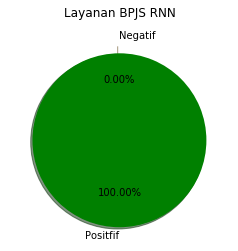

In [31]:
#Menampilkan hasil analisis sentimen

slices = [x, y]
activities = ['Negatif','Positfif']
cols = ['orange','g']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%0.2f%%')

plt.title('Layanan BPJS RNN')
plt.plot
plt.savefig("static/images/rnn.png")
plt.show()